## Testing Baseline ML Models witha big loop 

In [13]:
"""
ADHD Prediction Dataset - Baseline Models Evaluation

This notebook implements and evaluates baseline machine learning models for ADHD prediction
to establish performance benchmarks before advanced feature engineering and model optimization.

Author: [Your Name]
Date: [Date]
Project: ADHD Sex Prediction
Input: Baseline dataset (minimal preprocessing)
Output: Baseline model performance metrics and comparison
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           f1_score, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb


# =============================================================================
# CONFIGURATION AND SETTINGS
# =============================================================================

# Set random seed for reproducibility
RANDOM_STATE = 42
TEST_SIZE = 0.2

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Plotting style
plt.style.use('default')
sns.set_palette("husl")


In [1]:
# =============================================================================
# DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

def load_and_explore_baseline_data():
    """
    Load baseline dataset and perform initial exploration.
    
    Returns:
    --------
    tuple
        (X, y, df) - Feature matrix, target vector, and full dataframe
    """
 
    
    # Load baseline dataset
    data_path = r"C:\Users\04ama\OneDrive\chemistry\ADHD_SEX_Prediction\notebooks\Feature Engineering\final_dataset.csv"

    try:
        df = pd.read_csv(data_path)
        print(f"  Dataset loaded successfully")
        print(f"  Dataset shape: {df.shape}")
        
        # Display target distribution
        target_counts = df['ADHD_Outcome'].value_counts()
        target_props = df['ADHD_Outcome'].value_counts(normalize=True)
        
        for label in sorted(df['ADHD_Outcome'].unique()):
            count = target_counts[label]
            prop = target_props[label]
            print(f" Class {label}: {count:,} samples ({prop:.1%})")
        
        # Prepare features and target
        target_col = 'ADHD_Outcome'
        X = df.drop(columns=[target_col, 'participant_id'], errors='ignore')
        y = df[target_col]
        
        print(f" Features shape: {X.shape}")
        print(f" Target shape: {y.shape}")
    
        # Check for missing values
        missing_counts = X.isnull().sum()
        if missing_counts.sum() > 0:
            print(f" Missing values detected:")
            missing_features = missing_counts[missing_counts > 0]
            for feature, count in missing_features.items():
                print(f"      • {feature}: {count} missing")
        else:
            print(f"   No missing values detected")
        
        return X, y, df
        
    except FileNotFoundError:
        print(f"   ❌ Error: Dataset not found at {data_path}")
        raise
    except Exception as e:
        print(f"   ❌ Error loading dataset: {str(e)}")
        raise

# ✅ FIXED: Call the function OUTSIDE the function definition
X, y, df = load_and_explore_baseline_data()

   ❌ Error loading dataset: name 'pd' is not defined


NameError: name 'pd' is not defined

In [15]:
# =============================================================================
# DATA SPLITTING STRATEGY
# =============================================================================

def create_baseline_splits(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE):
    """
    Create train/test splits for baseline model evaluation.
    
    Parameters:
    -----------
    X : pd.DataFrame
        Feature matrix
    y : pd.Series
        Target vector
    test_size : float
        Proportion for test set
    random_state : int
        Random seed for reproducibility
    
    Returns:
    --------
    tuple
        (X_train, X_test, y_train, y_test)
    """

    # Create stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    

    
    # Verify stratification
    print(f" Stratification Verification:")
    train_dist = y_train.value_counts(normalize=True).sort_index()
    test_dist = y_test.value_counts(normalize=True).sort_index()
    
    print(f"  Training distribution: {dict(train_dist.round(3))}")
    print(f"  Test distribution: {dict(test_dist.round(3))}")

    # Check if distributions are similar
    max_diff = abs(train_dist - test_dist).max()
    if max_diff < 0.05:
        print(f"  Stratification successful (max difference: {max_diff:.3f})")
    else:
        print(f"  Stratification concern (max difference: {max_diff:.3f})")

    return X_train, X_test, y_train, y_test

# Create data splits
X_train, X_test, y_train, y_test = create_baseline_splits(X, y)

 Stratification Verification:
  Training distribution: {0: 0.317, 1: 0.683}
  Test distribution: {0: 0.317, 1: 0.683}
  Stratification successful (max difference: 0.001)


 LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)      Performance Metrics:
          Accuracy: 0.7828
         Precision: 0.8552
         Recall: 0.8212
         F1-Binary: 0.8378
         F1-Macro: 0.7545
         F1-Weighted: 0.7851

  Confusion Matrix:


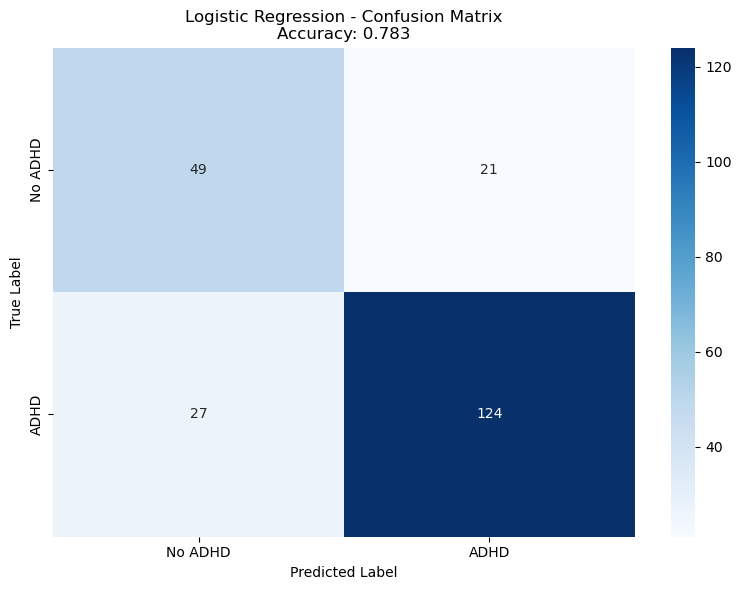

 RandomForestClassifier(class_weight='balanced', random_state=42)      Performance Metrics:
          Accuracy: 0.7828
         Precision: 0.7725
         Recall: 0.9669
         F1-Binary: 0.8588
         F1-Macro: 0.6941
         F1-Weighted: 0.7545

  Confusion Matrix:


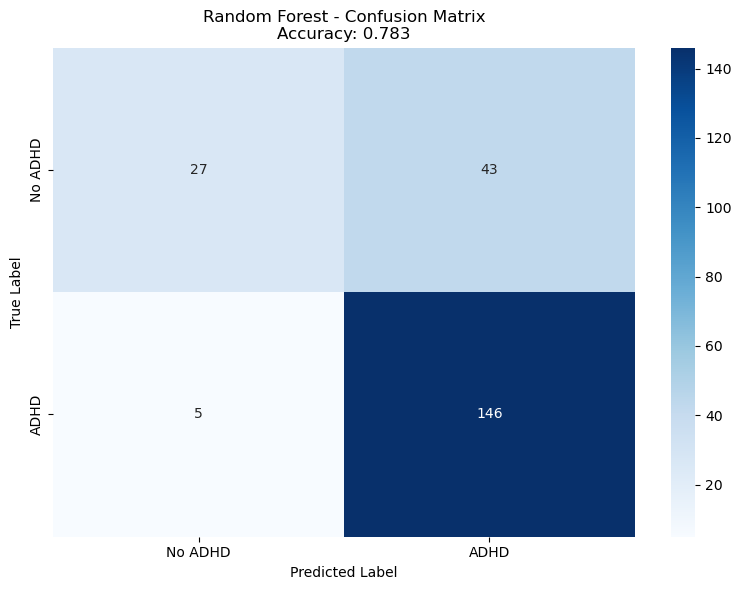

 SVC(class_weight='balanced', probability=True, random_state=42)      Performance Metrics:
          Accuracy: 0.7421
         Precision: 0.8406
         Recall: 0.7682
         F1-Binary: 0.8028
         F1-Macro: 0.7151
         F1-Weighted: 0.7472

  Confusion Matrix:


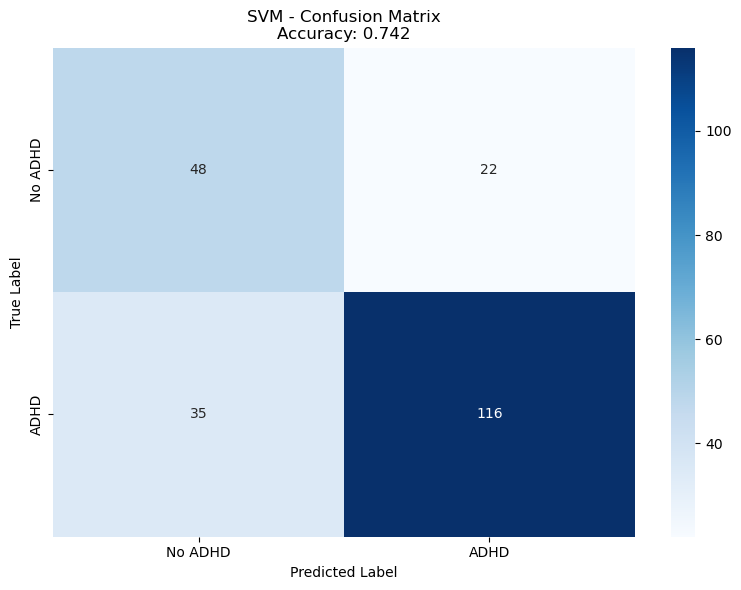

 LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)      Performance Metrics:
          Accuracy: 0.7647
         Precision: 0.8037
         Recall: 0.8675
         F1-Binary: 0.8344
         F1-Macro: 0.7141
         F1-Weighted: 0.7582

  Confusion Matrix:


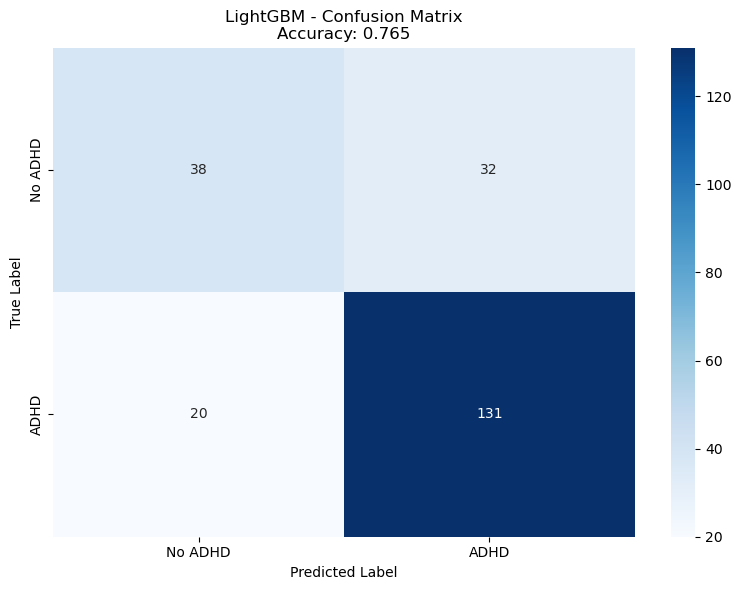

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)      Performance Metrics:
          Accuracy: 0.7738
         Precision: 0.7919
         Recall: 0.9073
         F1-Binary: 0.8457
         F1-Macro: 0.7110
         F1-Weighted: 0.7603

  Confusion Matrix:


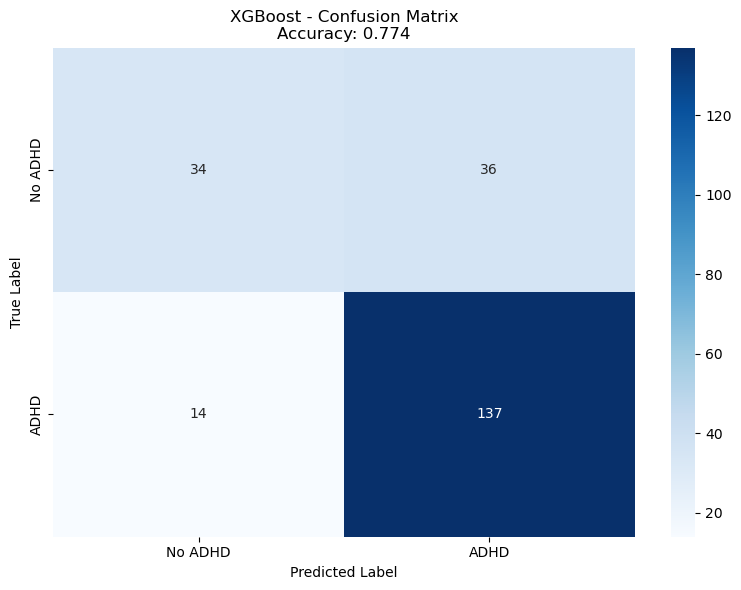

In [18]:
# =============================================================================
# BASELINE MODELS DEFINITION AND TRAINING
# =============================================================================

def define_baseline_models():
    """
    Define baseline machine learning models for comparison.
    
    Returns:
    --------
    dict
        Dictionary of model names and initialized models
    """
   
    
    models = {
        'Logistic Regression': LogisticRegression(
            random_state=RANDOM_STATE, 
            max_iter=1000,
            class_weight='balanced'
        ),
        'Random Forest': RandomForestClassifier(
            random_state=RANDOM_STATE, 
            n_estimators=100,
            class_weight='balanced'
        ),
        'SVM': SVC(
            random_state=RANDOM_STATE, 
            probability=True,
            class_weight='balanced'
        ),
        'LightGBM': lgb.LGBMClassifier(
            random_state=RANDOM_STATE,
            n_estimators=100,
            learning_rate=0.1,
            class_weight='balanced',
            verbose=-1  # Suppress training output
        ),
        'XGBoost': xgb.XGBClassifier(
            random_state=RANDOM_STATE,
            n_estimators=100,
            learning_rate=0.1,
            eval_metric='logloss',
            verbosity=0  # Suppress training output
        )
    }
    
    
    
  
    
    return models

def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Train and evaluate all baseline models.
    
    Parameters:
    -----------
    models : dict
        Dictionary of model names and initialized models
    X_train, X_test : pd.DataFrame
        Training and test feature matrices
    y_train, y_test : pd.Series
        Training and test target vectors
    
    Returns:
    --------
    dict
        Comprehensive results for all models
    """

    
    results = {}
    
    for i, (name, model) in enumerate(models.items(), 1):
       
        
        # Train the model
        model.fit(X_train, y_train)
        
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Calculate comprehensive metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1_binary = f1_score(y_test, y_pred, average='binary')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_binary': f1_binary,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'predictions': y_pred,
            'probabilities': y_proba
        }
        
        # Display results
        print(f" {model}      Performance Metrics:")
        print(f"          Accuracy: {accuracy:.4f}")
        print(f"         Precision: {precision:.4f}")
        print(f"         Recall: {recall:.4f}")
        print(f"         F1-Binary: {f1_binary:.4f}")
        print(f"         F1-Macro: {f1_macro:.4f}")
        print(f"         F1-Weighted: {f1_weighted:.4f}")

    
       
   
        # Confusion matrix
        print(f"\n  Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
       
        
        # Create confusion matrix visualization
        create_confusion_matrix_plot(cm, name, y_test, y_pred)
    
    return results

def create_confusion_matrix_plot(cm, model_name, y_true, y_pred):
    """Create and display confusion matrix plot."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No ADHD', 'ADHD'], 
                yticklabels=['No ADHD', 'ADHD'])
    plt.title(f'{model_name} - Confusion Matrix\nAccuracy: {accuracy_score(y_true, y_pred):.3f}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Define and train models
models = define_baseline_models()
results = train_and_evaluate_models(models, X_train, X_test, y_train, y_test)